# ***CLASSIFY Credit Card Risk (RF)***

## Problem:

* Credit score cards are a common risk control method in the financial industry.

* It uses personal information and data submitted by credit card applicants to predict the probability of future defaults and credit card borrowings.

* The bank is able to decide whether to issue a credit card to the applicant. Credit scores can objectively quantify the magnitude of risk.

* This is important because it can be risky to issue credit cards to customers who are likely to default on their payments.

In [123]:
#import Neccessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import datetime

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [124]:
cr = pd.read_csv('/content/credit_record.csv')
cr.head(3)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0


In [125]:
application = pd.read_csv('/content/application_record.csv')
application.head(3)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0


In [126]:
# merging 2 datasets
df = pd.merge(cr,application, on =['ID'], how='inner')
df.head(6)

,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,0,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008804,-1,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008804,-2,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
3,5008804,-3,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
4,5008804,-4,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
5,5008804,-5,C,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


In [127]:
#check the data types
df.dtypes

ID                       int64
MONTHS_BALANCE           int64
STATUS                  object
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

In [128]:

#lets check the shape 
print('Shape of train dataset:',df.shape)

Shape of train dataset: (777715, 20)


In [129]:
#df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   MONTHS_BALANCE       777715 non-null  int64  
 2   STATUS               777715 non-null  object 
 3   CODE_GENDER          777715 non-null  object 
 4   FLAG_OWN_CAR         777715 non-null  object 
 5   FLAG_OWN_REALTY      777715 non-null  object 
 6   CNT_CHILDREN         777715 non-null  int64  
 7   AMT_INCOME_TOTAL     777715 non-null  float64
 8   NAME_INCOME_TYPE     777715 non-null  object 
 9   NAME_EDUCATION_TYPE  777715 non-null  object 
 10  NAME_FAMILY_STATUS   777715 non-null  object 
 11  NAME_HOUSING_TYPE    777715 non-null  object 
 12  DAYS_BIRTH           777715 non-null  int64  
 13  DAYS_EMPLOYED        777715 non-null  int64  
 14  FLAG_MOBIL           777715 non-null  int64  
 15  FLAG_WORK_PHONE  

In [130]:
#lets check for Null Values
df.isnull().sum()

ID                          0
MONTHS_BALANCE              0
STATUS                      0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        240048
CNT_FAM_MEMBERS             0
dtype: int64

<AxesSubplot:>

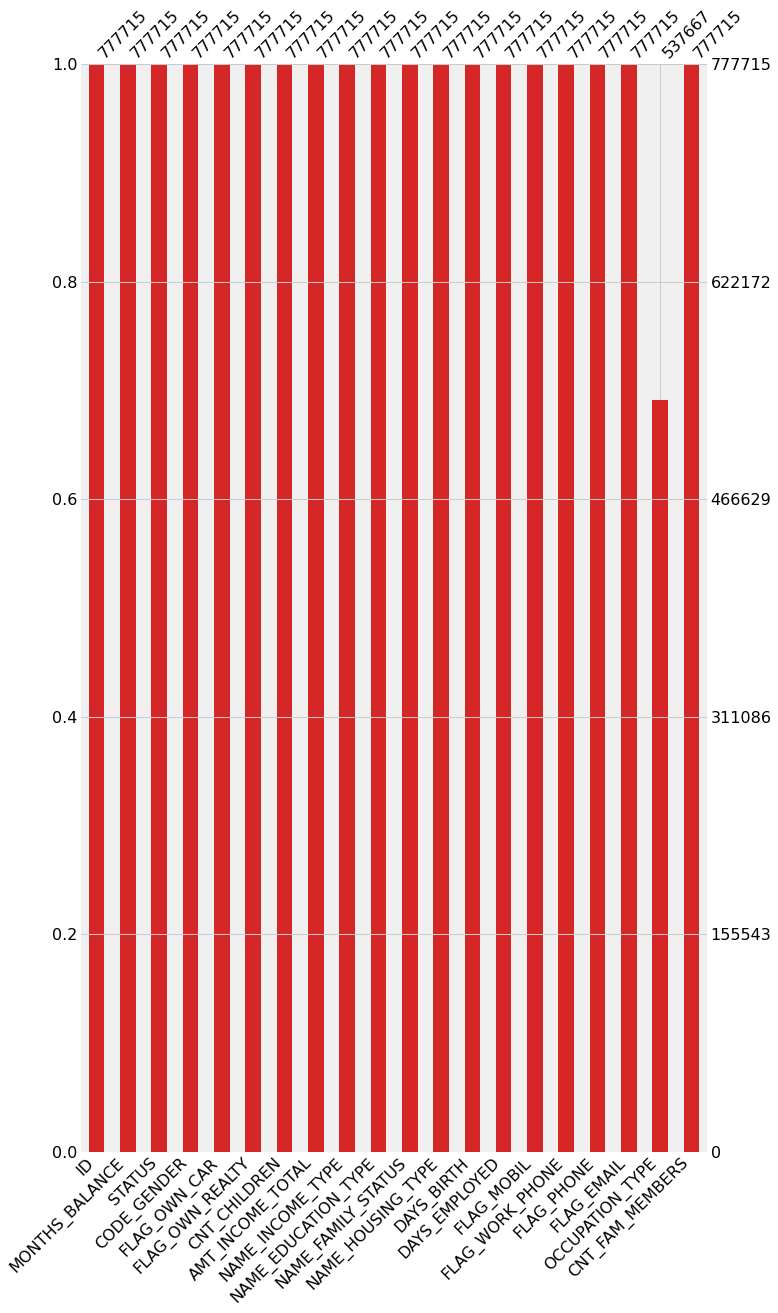

In [131]:
missingno.bar(df,figsize = (10,20), color="tab:red")

In [132]:
df.nunique()

ID                     36457
MONTHS_BALANCE            61
STATUS                     8
CODE_GENDER                2
FLAG_OWN_CAR               2
FLAG_OWN_REALTY            2
CNT_CHILDREN               9
AMT_INCOME_TOTAL         265
NAME_INCOME_TYPE           5
NAME_EDUCATION_TYPE        5
NAME_FAMILY_STATUS         5
NAME_HOUSING_TYPE          6
DAYS_BIRTH              7183
DAYS_EMPLOYED           3640
FLAG_MOBIL                 1
FLAG_WORK_PHONE            2
FLAG_PHONE                 2
FLAG_EMAIL                 2
OCCUPATION_TYPE           18
CNT_FAM_MEMBERS           10
dtype: int64

In [133]:
df.drop_duplicates(keep = 'first',inplace=True)
print(df.shape)

(777715, 20)


In [134]:
# checking missing values
df.isnull().sum()[df.isnull().sum()>0]

OCCUPATION_TYPE    240048
dtype: int64

In [135]:
df['OCCUPATION_TYPE'].unique()

array([nan, 'Security staff', 'Sales staff', 'Accountants', 'Laborers',
       'Managers', 'Drivers', 'Core staff', 'High skill tech staff',
       'Cleaning staff', 'Private service staff', 'Cooking staff',
       'Low-skill Laborers', 'Medicine staff', 'Secretaries',
       'Waiters/barmen staff', 'HR staff', 'Realty agents', 'IT staff'],
      dtype=object)

In [47]:
# dealing with missing values
df['OCCUPATION_TYPE'].fillna('others',inplace=True)

In [48]:
#checking null values
df.isna().sum()[df.isnull().sum()>0]

Series([], dtype: int64)

In [49]:

#Lets check which columns contains '?'
df[df.columns[(df == '?').any()]].nunique()

Series([], dtype: float64)

In [50]:
#Lets chcek the value counts for numerical data
for i in df.columns:
    if df[i].dtypes == 'int64':
        print(df[i].value_counts())
        print('---------'*10)

5148819    61
5115964    61
5061741    61
5078799    61
5061685    61
           ..
5139553     1
5069020     1
5097025     1
5023604     1
5092141     1
Name: ID, Length: 36457, dtype: int64
------------------------------------------------------------------------------------------
-1     24963
-2     24871
 0     24672
-3     24644
-4     24274
       ...  
-56     1588
-57     1253
-58      955
-59      627
-60      321
Name: MONTHS_BALANCE, Length: 61, dtype: int64
------------------------------------------------------------------------------------------
0     540639
1     155638
2      70399
3       9328
4       1224
5        324
14       111
7         46
19         6
Name: CNT_CHILDREN, dtype: int64
------------------------------------------------------------------------------------------
-14667    1018
-15140     928
-15675     835
-16995     799
-15519     799
          ... 
-18983       1
-7489        1
-20216       1
-22482       1
-16837       1
Name: DAYS_BIRTH, Length: 7183

In [51]:
#Lets chcek the value counts for categorical data
for i in df.columns:
    if df[i].dtypes == 'object':
        print(df[i].value_counts())
        print('---------'*10)

C    329536
0    290654
X    145950
1      8747
5      1527
2       801
3       286
4       214
Name: STATUS, dtype: int64
------------------------------------------------------------------------------------------
F    518851
M    258864
Name: CODE_GENDER, dtype: int64
------------------------------------------------------------------------------------------
N    473355
Y    304360
Name: FLAG_OWN_CAR, dtype: int64
------------------------------------------------------------------------------------------
Y    512948
N    264767
Name: FLAG_OWN_REALTY, dtype: int64
------------------------------------------------------------------------------------------
Working                 400164
Commercial associate    183385
Pensioner               128392
State servant            65437
Student                    337
Name: NAME_INCOME_TYPE, dtype: int64
------------------------------------------------------------------------------------------
Secondary / secondary special    524261
Higher education 

In [52]:
for col in df.columns:
    print(col,df[col].nunique())
    print('-'*35)

ID 36457
-----------------------------------
MONTHS_BALANCE 61
-----------------------------------
STATUS 8
-----------------------------------
CODE_GENDER 2
-----------------------------------
FLAG_OWN_CAR 2
-----------------------------------
FLAG_OWN_REALTY 2
-----------------------------------
CNT_CHILDREN 9
-----------------------------------
AMT_INCOME_TOTAL 265
-----------------------------------
NAME_INCOME_TYPE 5
-----------------------------------
NAME_EDUCATION_TYPE 5
-----------------------------------
NAME_FAMILY_STATUS 5
-----------------------------------
NAME_HOUSING_TYPE 6
-----------------------------------
DAYS_BIRTH 7183
-----------------------------------
DAYS_EMPLOYED 3640
-----------------------------------
FLAG_MOBIL 1
-----------------------------------
FLAG_WORK_PHONE 2
-----------------------------------
FLAG_PHONE 2
-----------------------------------
FLAG_EMAIL 2
-----------------------------------
OCCUPATION_TYPE 19
-----------------------------------
CNT_

In [57]:
def calc_day_of_birth (day_num):
    today = date.today() 
    birthDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    return birthDay
    
def calc_day_of_employed(day_num):
    today = date.today() 
    employedDay = (today + timedelta(days=day_num)).strftime('%Y-%m-%d')
    result = 0
    if employedDay > date.today().strftime('%Y-%m-%d') :
         result = 0
    else:
         result = employedDay
    return result

def get_label_for_data(status):
    if status in (2,3,4,5):
        return 1  # Risky
    else:
        return 0 # Not Risky
    

In [60]:
from datetime import date,datetime, timedelta
#get the day of birth for each person   
df['BIRTH_DAY']   = df['DAYS_BIRTH'].apply(calc_day_of_birth)
#get the day of birth for each person   
df['EMPLOYED_DAY']   = df['DAYS_EMPLOYED'].apply(calc_day_of_employed)


In [61]:
# replacing the value of C,X to numeric value 
df['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
df['STATUS']=df['STATUS'].astype(int)

In [62]:
df['TARGET'] = df['STATUS'].apply(get_label_for_data)

In [63]:
df['TARGET'].unique()

array([0, 1])

In [64]:
#drop un nessesary columns
df = df.drop(['ID','DAYS_BIRTH','MONTHS_BALANCE','DAYS_EMPLOYED','EMPLOYED_DAY','BIRTH_DAY','STATUS','FLAG_MOBIL'],axis=1)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          777715 non-null  object 
 1   FLAG_OWN_CAR         777715 non-null  object 
 2   FLAG_OWN_REALTY      777715 non-null  object 
 3   CNT_CHILDREN         777715 non-null  int64  
 4   AMT_INCOME_TOTAL     777715 non-null  float64
 5   NAME_INCOME_TYPE     777715 non-null  object 
 6   NAME_EDUCATION_TYPE  777715 non-null  object 
 7   NAME_FAMILY_STATUS   777715 non-null  object 
 8   NAME_HOUSING_TYPE    777715 non-null  object 
 9   FLAG_WORK_PHONE      777715 non-null  int64  
 10  FLAG_PHONE           777715 non-null  int64  
 11  FLAG_EMAIL           777715 non-null  int64  
 12  OCCUPATION_TYPE      777715 non-null  object 
 13  CNT_FAM_MEMBERS      777715 non-null  float64
 14  TARGET               777715 non-null  int64  
dtypes: float64(2), in

# Data processing

## Apply label encoder to target variable

In [66]:
from sklearn.preprocessing import LabelEncoder
leb_enc = LabelEncoder()
df2 = leb_enc.fit_transform(df["TARGET"])
pd.Series(df2)
df["TARGET"] = df2

In [67]:
df.columns

Index(['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'TARGET'],
      dtype='object')

## Heat map for checking correlation

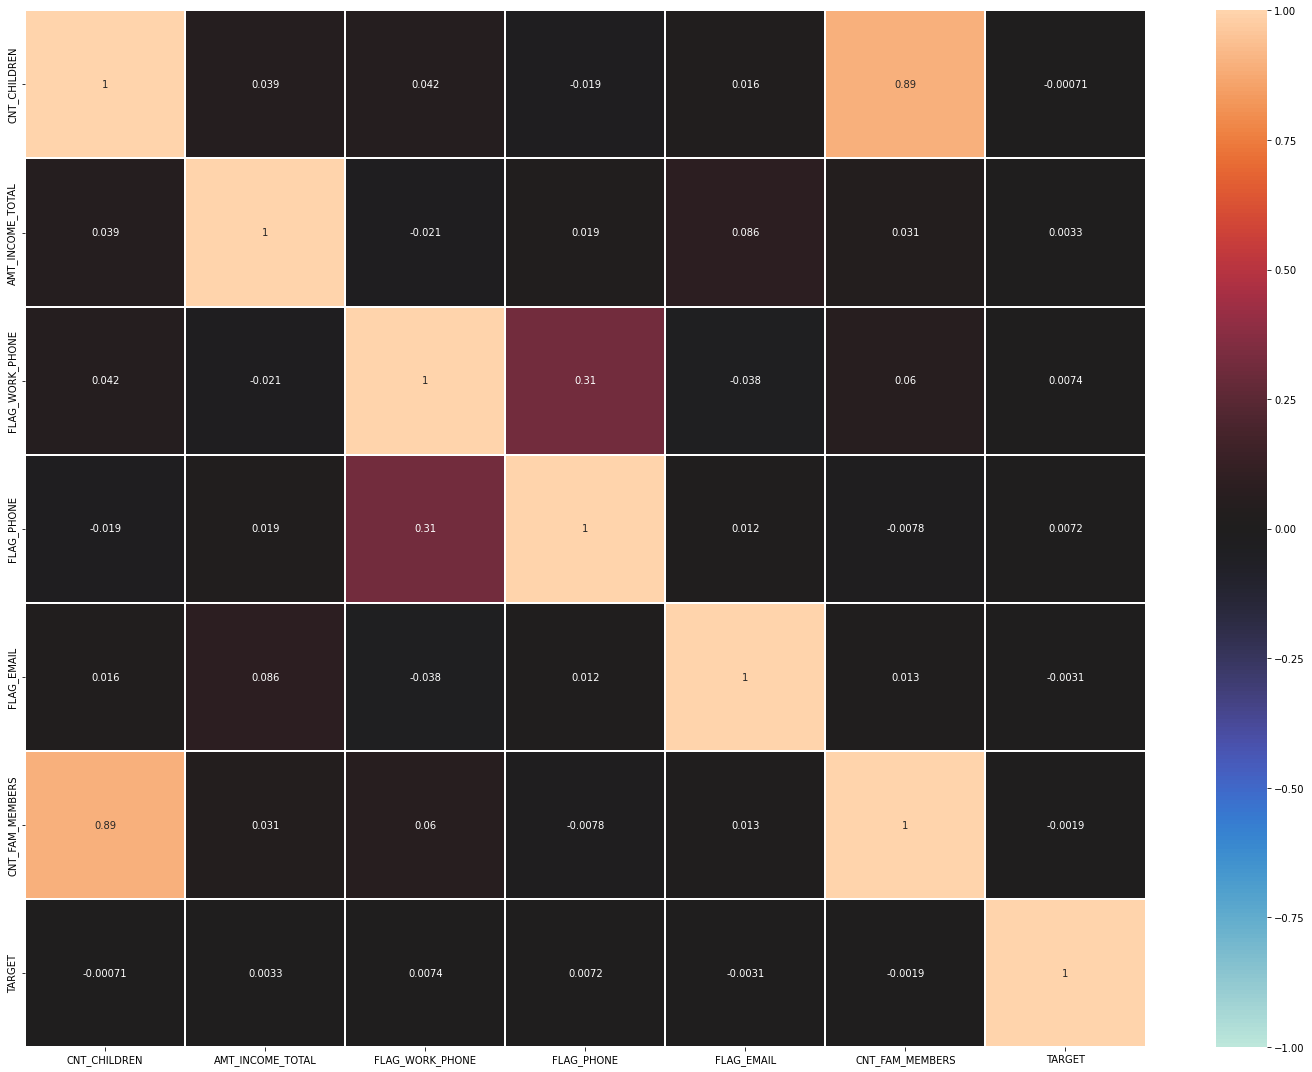

In [68]:
#Lets plot heatmap to check correlation among differnt features and label
df_corr = df.corr()
plt.figure(figsize = (20,15))
sns.heatmap(df_corr,vmin=-1,vmax=1,annot=True,center=0,fmt='.2g',linewidths=0.1)
plt.tight_layout()

In [71]:
#lets describe the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CNT_CHILDREN,777715.0,0.428082,0.745755,0.0,0.0,0.0,1.0,19.0
AMT_INCOME_TOTAL,777715.0,188534.802074,101622.450077,27000.0,121500.0,162000.0,225000.0,1575000.0
FLAG_WORK_PHONE,777715.0,0.231818,0.421993,0.0,0.0,0.0,0.0,1.0
FLAG_PHONE,777715.0,0.300965,0.458678,0.0,0.0,0.0,1.0,1.0
FLAG_EMAIL,777715.0,0.091675,0.288567,0.0,0.0,0.0,0.0,1.0
CNT_FAM_MEMBERS,777715.0,2.208837,0.907380,1.0,2.0,2.0,3.0,20.0
TARGET,777715.0,0.003636,0.060192,0.0,0.0,0.0,0.0,1.0


## Checking for outliers using box plots

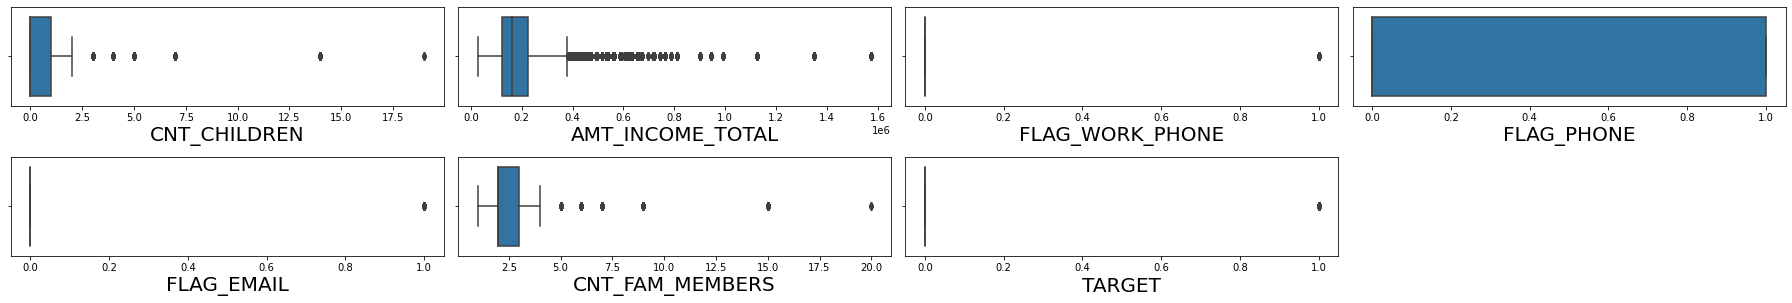

In [72]:

#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=45:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

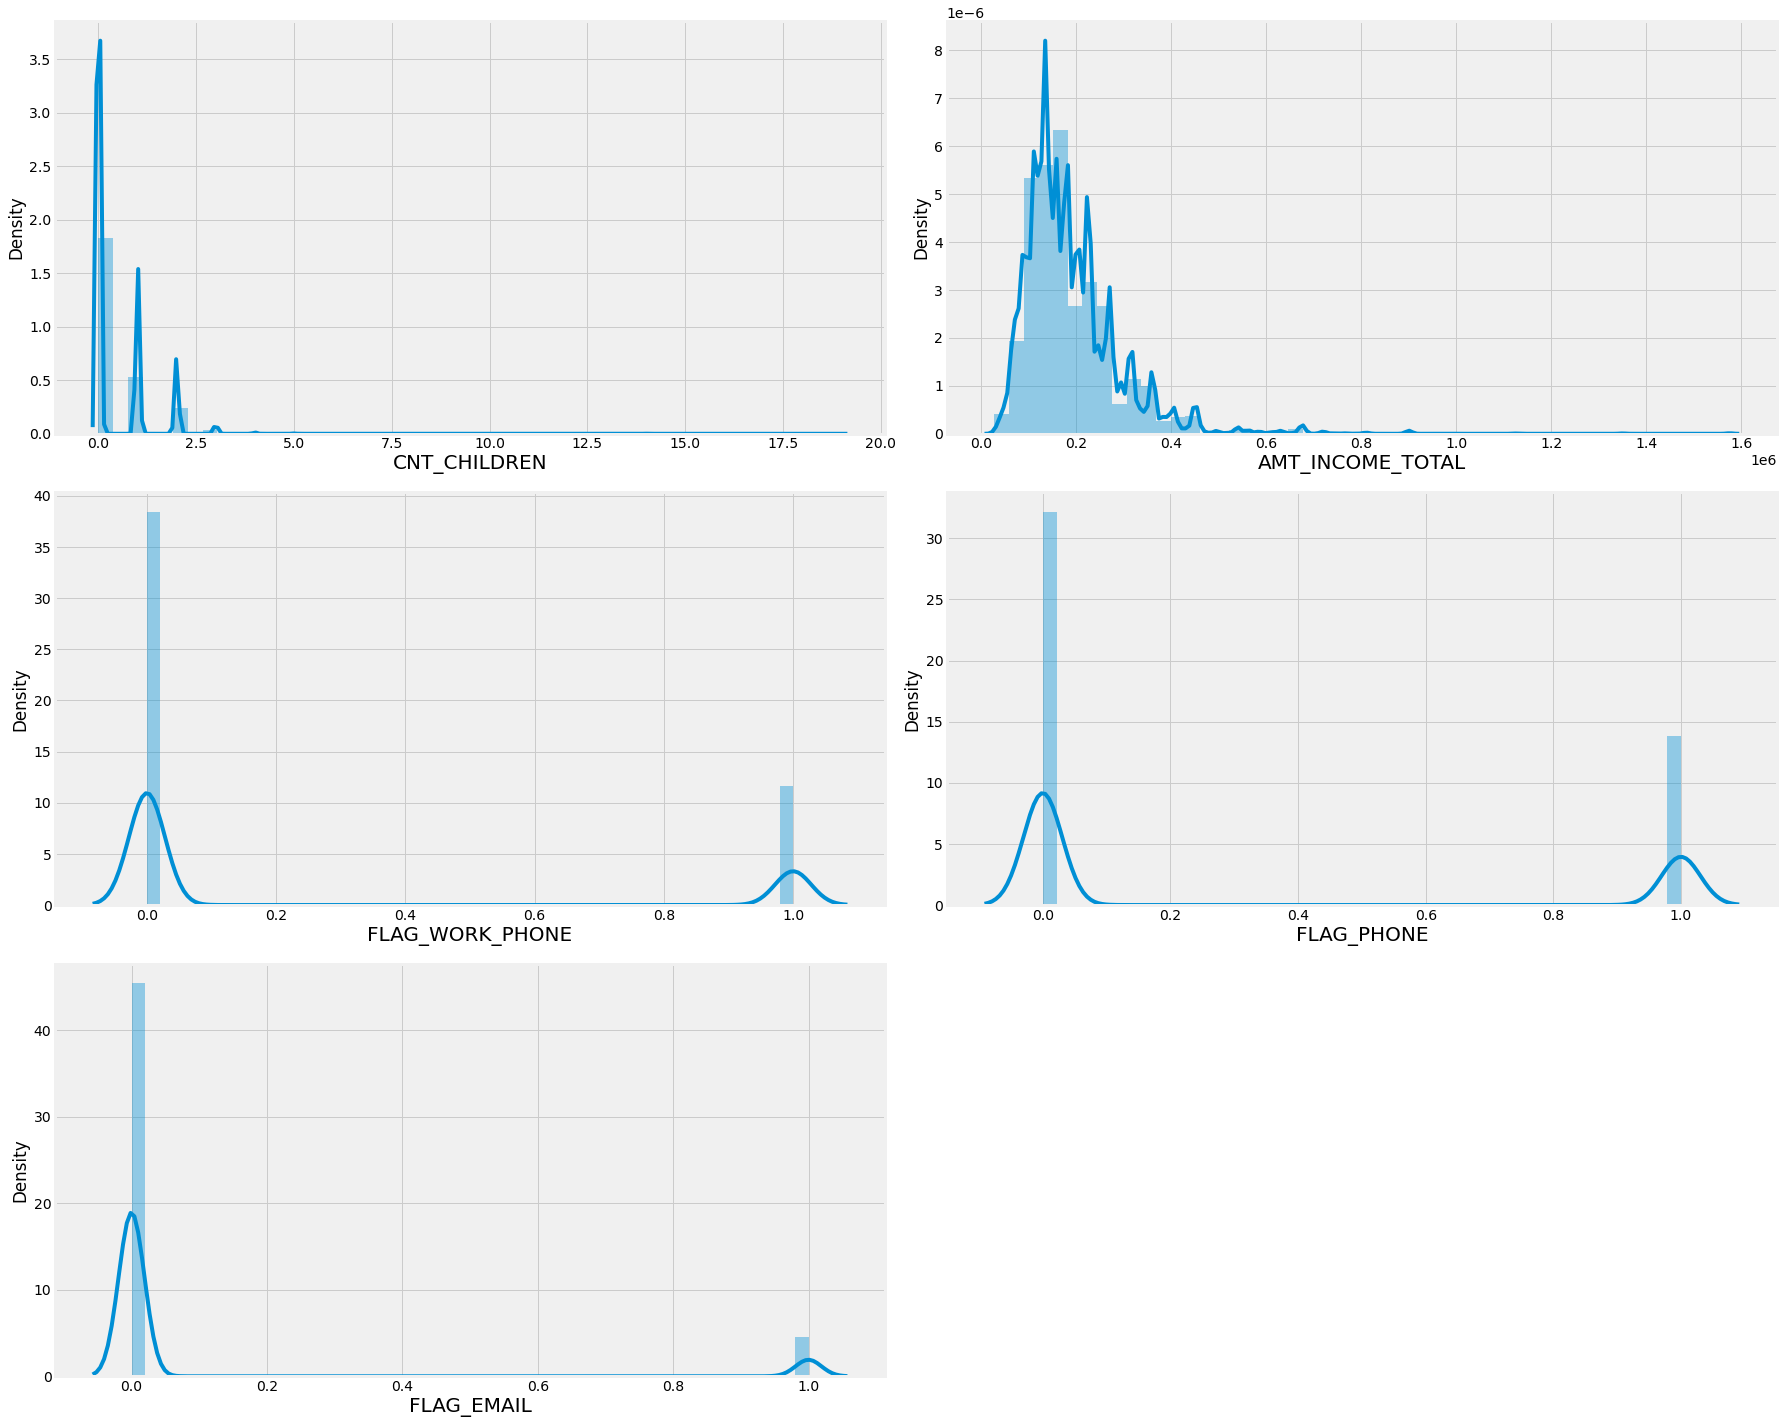

In [73]:

#lets see the destribution of numerical data
num_data = df._get_numeric_data()
plt.figure(figsize = (25,20))
plt.style.use('fivethirtyeight')
plotnumber = 1
for column in num_data:
    if plotnumber <=5:
        ax = plt.subplot(3,2,plotnumber)
        sns.distplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [74]:

#lets check for skewness
df.skew()

CNT_CHILDREN         2.587310
AMT_INCOME_TOTAL     2.577642
FLAG_WORK_PHONE      1.271030
FLAG_PHONE           0.867866
FLAG_EMAIL           2.830028
CNT_FAM_MEMBERS      1.324175
TARGET              16.492726
dtype: float64

## Separate features and label as x & y respectively

In [75]:
x = df.drop(columns = 'TARGET')
y = df['TARGET']

In [76]:

x.skew()

CNT_CHILDREN        2.587310
AMT_INCOME_TOTAL    2.577642
FLAG_WORK_PHONE     1.271030
FLAG_PHONE          0.867866
FLAG_EMAIL          2.830028
CNT_FAM_MEMBERS     1.324175
dtype: float64

In [77]:

#Lets treat the skewness from numerical columns
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.cbrt(x[index])

In [78]:

#check the skewness again
x.skew()

CNT_CHILDREN        1.205022
AMT_INCOME_TOTAL    0.071355
FLAG_WORK_PHONE     1.271030
FLAG_PHONE          0.867866
FLAG_EMAIL          2.830028
CNT_FAM_MEMBERS     0.139806
dtype: float64

In [79]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

## Applying StandardScaler to numerical features

In [80]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [81]:
#combine both numerical and categorical features
X = pd.concat([x_num,cat], axis = 1)

In [82]:

#lets have a look at our features
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,others
1,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,others
2,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,others
3,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,others
4,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,M,Y,Y,Working,Higher education,Civil marriage,Rented apartment,others


## Encoding

In [83]:

#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [84]:

#lets have a look at data after encoding
X.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE
0,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,1.0,1.0,1.0,4.0,1.0,0.0,4.0,18.0
1,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,1.0,1.0,1.0,4.0,1.0,0.0,4.0,18.0
2,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,1.0,1.0,1.0,4.0,1.0,0.0,4.0,18.0
3,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,1.0,1.0,1.0,4.0,1.0,0.0,4.0,18.0
4,-0.630236,1.947864,1.820367,-0.656158,-0.317691,-0.111261,1.0,1.0,1.0,4.0,1.0,0.0,4.0,18.0


In [85]:

#check the shape
X.shape

(777715, 14)

In [86]:

#check value count for target variable
y.value_counts()

0    774887
1      2828
Name: TARGET, dtype: int64

## Over sampling

In [87]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [88]:
#lets check the count of target variable now
y_over.value_counts()

0    774887
1    774887
Name: TARGET, dtype: int64

## Finding Best random state

In [89]:

#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(50,100):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.5737474318869308 on Random State 51


In [90]:

#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 51)

# Model Building with Evaluation Metrics

## LogisticRegression model

In [91]:

#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 57.37474318869308
roc_auc_score: 57.36817964303308
---------------------------------------------------
Confusion Matrix : 
 [[118608  75453]
 [ 89696 103687]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.57      0.61      0.59    194061
           1       0.58      0.54      0.56    193383

    accuracy                           0.57    387444
   macro avg       0.57      0.57      0.57    387444
weighted avg       0.57      0.57      0.57    387444


Cross validation score : 56.53663017655

Accuracy Score - Cross Validation Score : 0.8381130121430829


## DecisionTreeClassifier model

In [92]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 97.58752232580709
roc_auc_score: 97.590446673441
---------------------------------------------------
Confusion Matrix : 
 [[186142   7919]
 [  1428 191955]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    194061
           1       0.96      0.99      0.98    193383

    accuracy                           0.98    387444
   macro avg       0.98      0.98      0.98    387444
weighted avg       0.98      0.98      0.98    387444


Cross validation score : 93.79070712925446


Accuracy Score - Cross Validation Score : 3.796815196552629


## RandomForestClassifier model

In [94]:

#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(x_train,y_train)
pred_rf = model.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(model, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 97.58984524215111

roc_auc_score: 97.59277275852945
---------------------------------------------------
Confusion Matrix : 
 [[186143   7918]
 [  1420 191963]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    194061
           1       0.96      0.99      0.98    193383

    accuracy                           0.98    387444
   macro avg       0.98      0.98      0.98    387444
weighted avg       0.98      0.98      0.98    387444


Cross validation score : 96.06600662820341


Accuracy Score - Cross Validation Score : 1.523838613947703


## Naive Bayes

In [95]:
#model with KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(x_train,y_train)
pred_kn = clf.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(clf, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 55.90304663383612
roc_auc_score: 55.9070230725722
---------------------------------------------------
Confusion Matrix : 
 [[104084  89977]
 [ 80874 112509]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.56      0.54      0.55    194061
           1       0.56      0.58      0.57    193383

    accuracy                           0.56    387444
   macro avg       0.56      0.56      0.56    387444
weighted avg       0.56      0.56      0.56    387444


Cross validation score : 55.3790410994256


Accuracy Score - Cross Validation Score : 0.5240055344105201


## KNeighborsClassifier model

In [96]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 97.3877515202197
roc_auc_score: 97.39032296007414
---------------------------------------------------
Confusion Matrix : 
 [[186145   7916]
 [  2205 191178]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.99      0.96      0.97    194061
           1       0.96      0.99      0.97    193383

    accuracy                           0.97    387444
   macro avg       0.97      0.97      0.97    387444
weighted avg       0.97      0.97      0.97    387444


Cross validation score : 67.56940200418185


Accuracy Score - Cross Validation Score : 29.81834951603784


## XGBClassifier model

In [97]:

#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 96.58505487244608
roc_auc_score: 96.58712883314449
---------------------------------------------------
Confusion Matrix : 
 [[185138   8923]
 [  4308 189075]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97    194061
           1       0.95      0.98      0.97    193383

    accuracy                           0.97    387444
   macro avg       0.97      0.97      0.97    387444
weighted avg       0.97      0.97      0.97    387444


Cross validation score : 95.2976367805148

Accuracy Score - Cross Validation Score : 1.2874180919312863


## ExtraTreesClassifier model

In [98]:

#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 5,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 96.58505487244608
roc_auc_score: 96.58712883314449
---------------------------------------------------
Confusion Matrix : 
 [[185138   8923]
 [  4308 189075]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.98      0.95      0.97    194061
           1       0.95      0.98      0.97    193383

    accuracy                           0.97    387444
   macro avg       0.97      0.97      0.97    387444
weighted avg       0.97      0.97      0.97    387444


Cross validation score : 95.7210530470747

Accuracy Score - Cross Validation Score : 0.8640018253713748


# THANK YOU